In [25]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

from scipy import stats
warnings.filterwarnings('ignore')

# Large dataset
import dask.bag as db

import seaborn as sns
color = sns.color_palette()
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report


In [13]:
furniture = pd.read_table("archive/amazon_reviews_us_Furniture_v1_00.tsv",sep='\t', on_bad_lines='skip')
furniture.head(10)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,24509695,R3VR960AHLFKDV,B004HB5E0E,488241329,Shoal Creek Computer Desk,Furniture,4,0,0,N,Y,... desk is very study and it i has a beautifu...,This desk is very study and it i has a beauti...,2015-08-31
1,US,34731776,R16LGVMFKIUT0G,B0042TNMMS,205864445,Dorel Home Products Delaney Large Rectangular ...,Furniture,5,0,0,N,Y,Five Stars,Great item,2015-08-31
2,US,1272331,R1AIMEEPYHMOE4,B0030MPBZ4,124663823,Bathroom Vanity Table Jewelry Makeup Desk Benc...,Furniture,5,1,1,N,Y,Five Stars,"Perfect fit for my bedroom, been wanting one s...",2015-08-31
3,US,45284262,R1892CCSZWZ9SR,B005G02ESA,382367578,Sleep Master Ultima Comfort Memory Foam 6 Inch...,Furniture,3,0,0,N,Y,Good enough,"We use this on a trundle bed. So, it does not...",2015-08-31
4,US,30003523,R285P679YWVKD1,B005JS8AUA,309497463,"1 1/4"" GashGuards: Deluxe Rubberized Plastic B...",Furniture,3,0,0,N,N,Gash Gards for daybed,The product is fine...just seemed like it took...,2015-08-31
5,US,18311821,RLB33HJBXHZHU,B00AVUQQGQ,574537906,Serta Bonded Leather Big & Tall Executive Chair,Furniture,5,0,0,N,Y,Five Stars,"Love this product, amazing delivery, thank you",2015-08-31
6,US,42943632,R1VGTZ94DBAD6A,B00CFY20GQ,407473883,Prepac Shoe Storage Cubbie Bench,Furniture,5,2,2,N,Y,I love this bench,"I love this bench, had one in Black for over f...",2015-08-31
7,US,43157304,R168KF82ICSOHD,B00FKC48QA,435120460,HomCom PU Leather Storage Bench Ottoman w/ 4 T...,Furniture,5,0,0,N,Y,Great storage capacity,Have had this for over a year. Very well made...,2015-08-31
8,US,51918480,R20DIYIJ0OCMOG,B00N9IAL9K,356495985,Folding Step Stool,Furniture,5,0,0,N,Y,This is the best step stool I have ever used,This is the best step stool I have ever used. ...,2015-08-31
9,US,14522766,RD46RNVOHNZSC,B001T4XU1C,243050228,Ace Bayou Adult Video Rocker,Furniture,5,0,0,N,Y,great for price!,my son loves it!,2015-08-31


In [51]:
furniture = furniture[furniture['review_body'].notna()]

(array([     0., 100000., 200000., 300000., 400000., 500000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

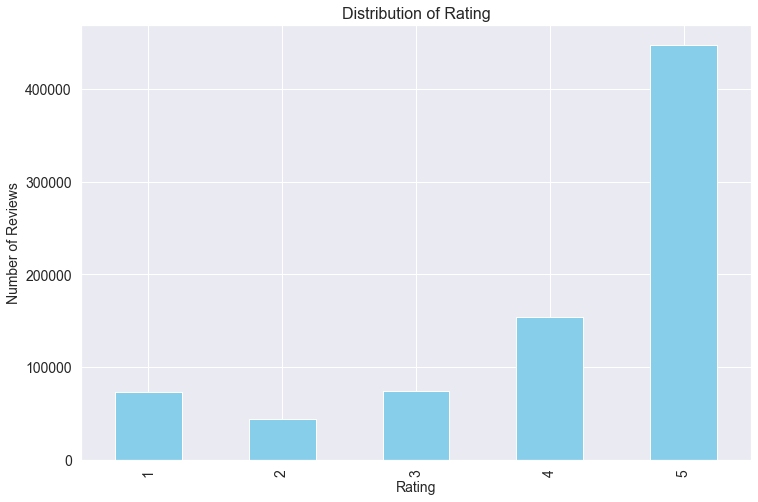

In [52]:
plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
furniture['star_rating'].value_counts().sort_index().plot(kind='bar',color = "#87CEEB")
plt.title('Distribution of Rating',size=16)
plt.xlabel('Rating',size=14)
plt.ylabel('Number of Reviews',size=14)
plt.xticks(size=14)
plt.yticks(size=14)

In [53]:
df = furniture[furniture['star_rating'] != 3]
df['sentiment'] = df['star_rating'].apply(lambda rating : +1 if rating > 3 else -1)
#add another column sentimentt contains values negative and positive
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})

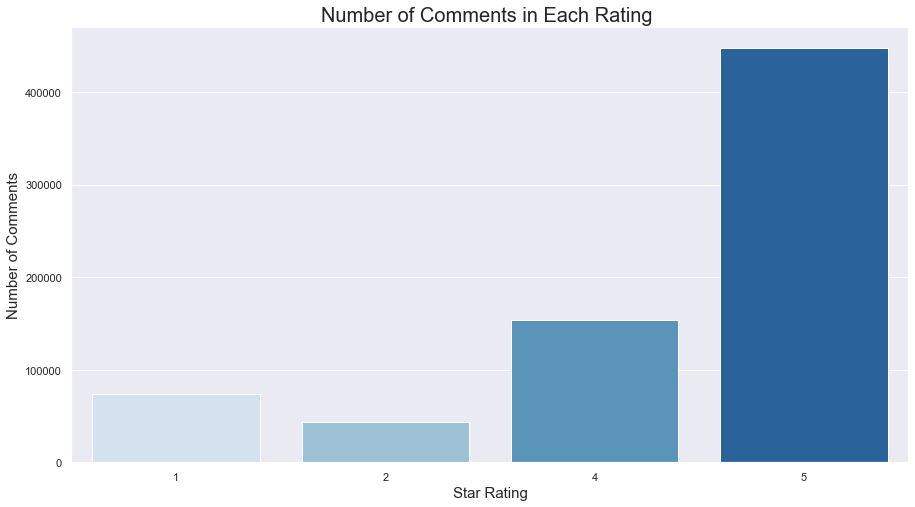

In [54]:
sns.set_theme(style="darkgrid")
#Specifiy the figure size 
plt.figure(figsize=(15,8))

ax = sns.countplot(x="star_rating", data = df, palette="Blues")
ax.set_title("Number of Comments in Each Rating ", fontsize=20)
ax.set_xlabel("Star Rating",fontsize=15)
ax.set_ylabel("Number of Comments",fontsize=15)
plt.show()


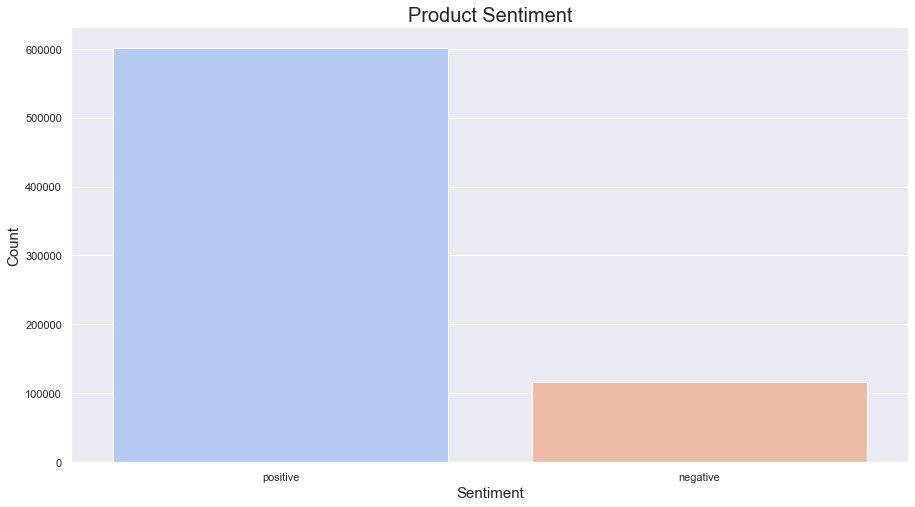

In [55]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x="sentimentt", data = df, palette="coolwarm")
ax.set_title("Product Sentiment", fontsize=20)
ax.set_xlabel("Sentiment",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
plt.show()

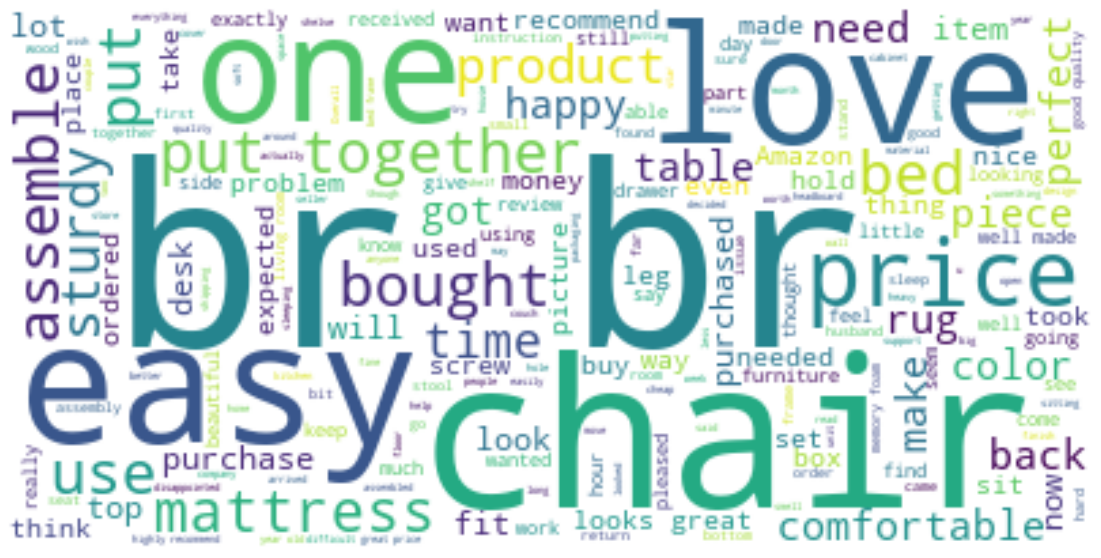

In [70]:
#Joint each word in each comment together separate by space
textt = " ".join(review for review in df.review_body)

wordcloud = WordCloud(background_color = "white").generate(textt)
# Plot the worldclou to show the most frequent words in the image
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
with open("wordcloud.svg", "w") as text_file:
    text_file.write(wordcloud.to_svg())

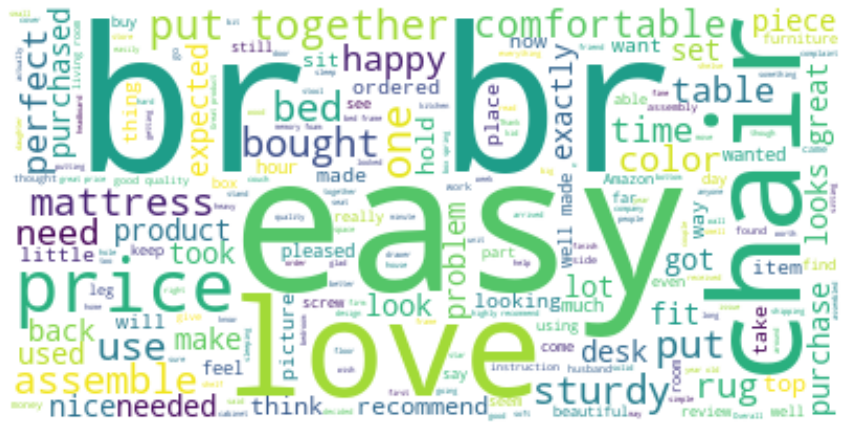

In [72]:
positive = df[df['sentiment'] == 1]
positive = positive.dropna()

## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.review_body)
wordcloud2 = WordCloud(background_color="white").generate(pos)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
with open("wordcloud2.svg", "w") as text_file:
    text_file.write(wordcloud2.to_svg())

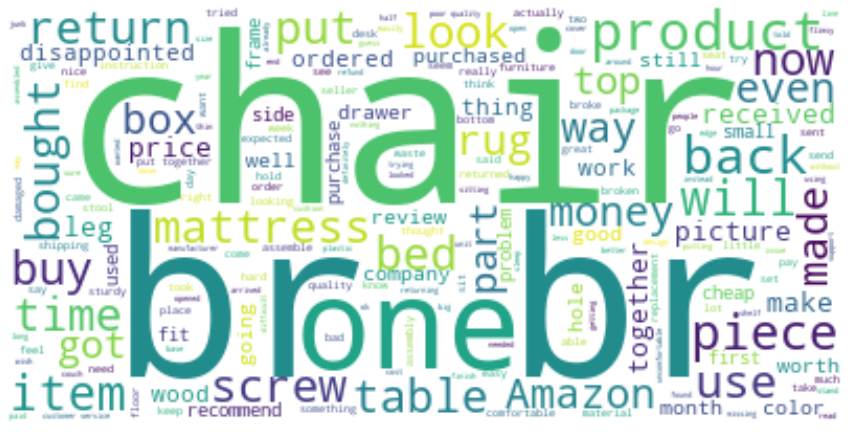

In [71]:
negative = df[df['sentiment'] == -1]
negative = negative.dropna()

neg = " ".join(review for review in negative.review_body)

wordcloud3 = WordCloud(background_color = "white").generate(neg)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
with open("wordcloud3.svg", "w") as text_file:
    text_file.write(wordcloud3.to_svg())